## 11번가 베스트 상품 이미지 크롤링

### 11번가 베스트 상품 이미지 크롤링
* 도전! 베스트 탑 5 상품 이미지

In [44]:
import requests
from bs4 import BeautifulSoup

best_url = 'https://www.11st.co.kr/browsing/BestSeller.tmall?method=getBestSellerMain&xfrom=main^gnb'

res = requests.get(best_url)

soup = BeautifulSoup(res.content, 'html.parser')

In [ ]:
# 다섯장의 이미지 링크 출력

products = soup.select('#challengeBestAdList > li > div.box_pd > a > div.img_plot > img')
# products[0].get('src')
for product in products[:5]:  # 수집할 이미지 개수
    print(product.get('src'))

https://cdn.011st.com/11dims/resize/600x600/quality/75/11src/product/7864204345/B.jpg?426000000
https://cdn.011st.com/11dims/resize/600x600/quality/75/11src/product/2949478057/L300.jpg?132000000
https://cdn.011st.com/11dims/resize/600x600/quality/75/11src/product/3788536392/B.jpg?823000000
https://cdn.011st.com/11dims/resize/600x600/quality/75/11src/dl/v2/4/1/0/1/2/5/XyzEB/1923410125_194203214.jpg
https://cdn.011st.com/11dims/resize/600x600/quality/75/11src/product/7710266971/L300.png?458000000


In [ ]:
# 이미지 다운로드하기
from urllib.request import urlopen


for num, product in enumerate(products[:5]): # 수집할 이미지 개수
    img_url = product.get('src')

    with urlopen(img_url) as src: #읽어들일 이미지 스트림 열기
        with open(f'./image/img_테스트{num+1}.png','wb') as tgt: # w - write b - binary, 쓰기할 이미지 스트림 열기
            img = src.read() #이미지 읽기
            tgt.write(img)  # 이미지 쓰기

----------

## 도전! 베스트 탑5 이미지 추출 종합

In [47]:
import requests
from urllib import request
from urllib.request import urlopen
from bs4 import BeautifulSoup

best_url = 'https://www.11st.co.kr/browsing/BestSeller.tmall?method=getBestSellerMain&xfrom=main%5Egnb'

res = requests.get(best_url)

soup = BeautifulSoup(res.content, 'html.parser')
                 
products = soup.select('#challengeBestAdList > li > div.box_pd > a > div.img_plot > img')   ## 베스트 상품 리스트


# 이미지 다운로드시 파일 형태 img_1.png

from urllib.request import urlopen


for num, product in enumerate(products[:5]): # 수집할 이미지 개수
    img_url = product.get('src')

    with urlopen(img_url) as src: #읽어들일 이미지 스트림 열기
        with open(f'./image/img_{num+1}.png','wb') as tgt: # w - write b - binary, 쓰기할 이미지 스트림 열기
            img = src.read() #이미지 읽기
            tgt.write(img)  # 이미지 쓰기




print("Image Crawling is done")

Image Crawling is done


### 파일이름에 상품명이 같이 나오도록 바꾸기

* 예) img1.jpg -> img1_겨울 따뜻한 후리스조끼플리스자켓패딩기모바지.jpg

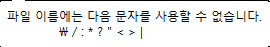
> 파일 이름에는 위와 같은 특수문자가 들어갈 수 없기 때문에 정규화 과정이 필요

In [73]:
print(products[0].get('alt'))

안단잼 땅콩 피넛 버터 400g 크런치,크리미 / 1병+1병 800g


In [81]:
# 정규화 함수
# 숫자,소문자,대문자,자음모음,한글모두
# ^ : Not의 의미
import re
re.sub(r'[^\w_ ]','', products[0].get('alt'))  # 알파벳, 숫자, 언더바(_), 띄어쓰기기를 제외한 모든 특수문자 제거

'안단잼 땅콩 피넛 버터 400g 크런치크리미  1병1병 800g'

In [84]:
import re
import requests
from urllib import request
from urllib.request import urlopen
from bs4 import BeautifulSoup

best_url = 'https://www.11st.co.kr/browsing/BestSeller.tmall?method=getBestSellerMain&xfrom=main%5Egnb'

res = requests.get(best_url)

soup = BeautifulSoup(res.content, 'html.parser')
                 
products = soup.select('#challengeBestAdList > li > div.box_pd > a > div.img_plot > img')   ## 베스트 상품 리스트


# 이미지 다운로드시 파일 형태 img_1.png

from urllib.request import urlopen


for num, product in enumerate(products[:5]):                # 수집할 이미지 개수
    img_url = product.get('src')                            # 이미지 url 추출출
    product_name = product.get('alt')                       # 상품명 추출 
    product_name = re.sub(r'[^\w_ ]', '', product_name)     # 정규표현식

    with urlopen(img_url) as src: #읽어들일 이미지 스트림 열기
        with open(f'./image/img{num+1}_{product_name}.png','wb') as tgt: # w - write b - binary, 쓰기할 이미지 스트림 열기
            img = src.read() #이미지 읽기
            tgt.write(img)  # 이미지 쓰기




print("Image Crawling is done")

Image Crawling is done
